In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_boston

sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

In [2]:
# loading the data
df = pd.read_csv("Boston.csv")


This returns all keys and values as python dictionary. 

In [3]:
print(df.keys())

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


Here you can view the data set description using boston.DESCR, which describes each feature in the data set.

In [4]:
print(df.columns)

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


So MEDV is our target variable, which we need to predict and remaining are our features.

Now that we got our data loaded, let's get our data frame ready quickly and work ahead.

In [5]:
# df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()
# print the columns present in the dataset
print(df.columns)
# print the top 5 rows in the dataset
print(df.head()) 

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')
      CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In new overall dataframe let’s check if we have any missing values in the data set.

In [6]:
df.isna().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

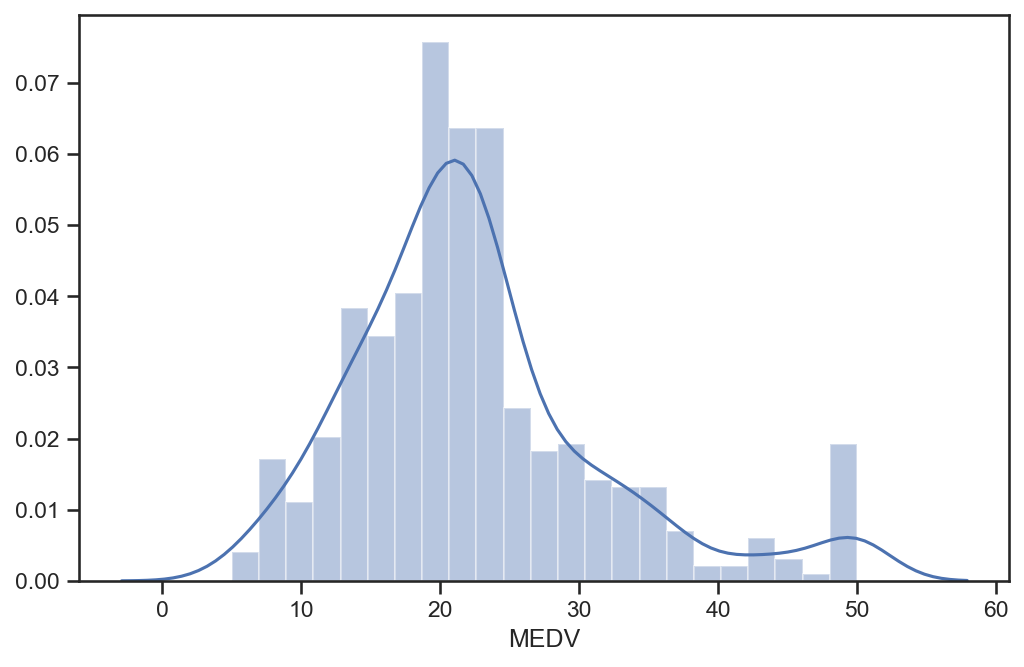

In [7]:
sns.distplot(df['MEDV'])
plt.show()

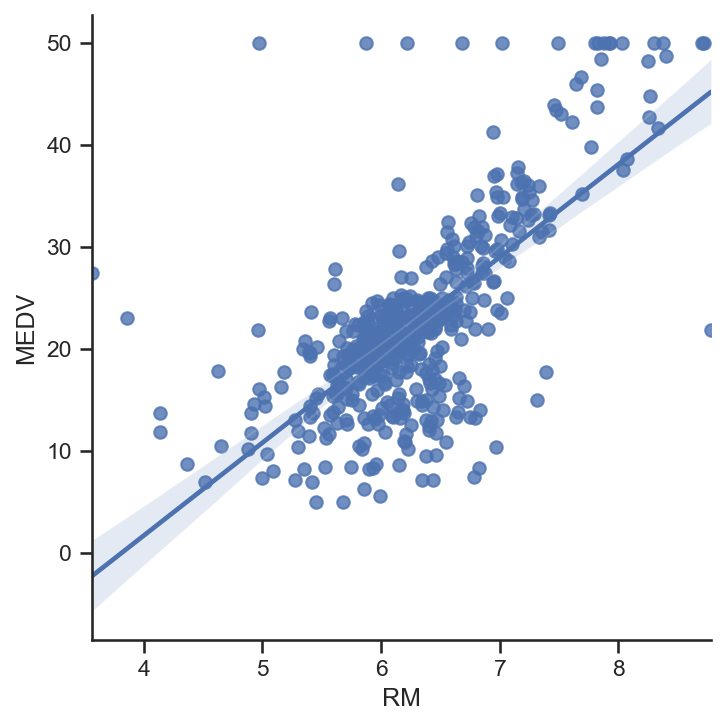

In [8]:
sns.lmplot(x = 'RM', y = 'MEDV', data = df)


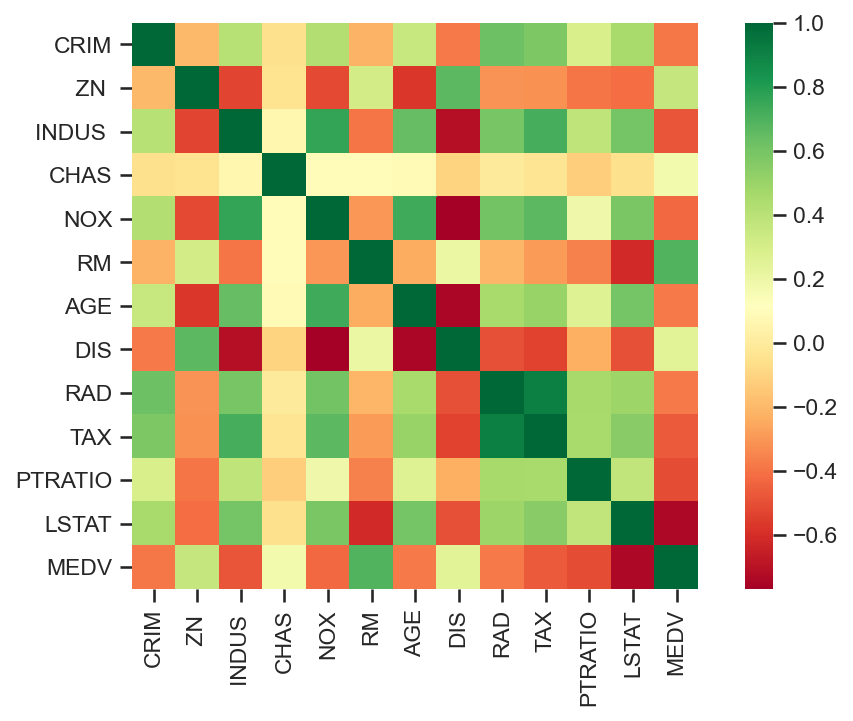

In [9]:
#plotting heatmap for overall data set
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [10]:
# Preparing the data
X = df[['RM']]
y = df[['MEDV']]

In [11]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [12]:
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fitting the training data to our model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model Evaluation**



In [13]:
#check prediction score
regressor.score(X_test, y_test)

0.5383003344910231

In [14]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,25.153909
1,31.1,26.773693
2,23.5,22.284072
3,26.6,27.997335
4,19.6,14.484456
5,14.3,23.569336
6,50.0,32.839084
7,14.3,16.535597
8,20.7,19.026896
9,37.6,37.689635


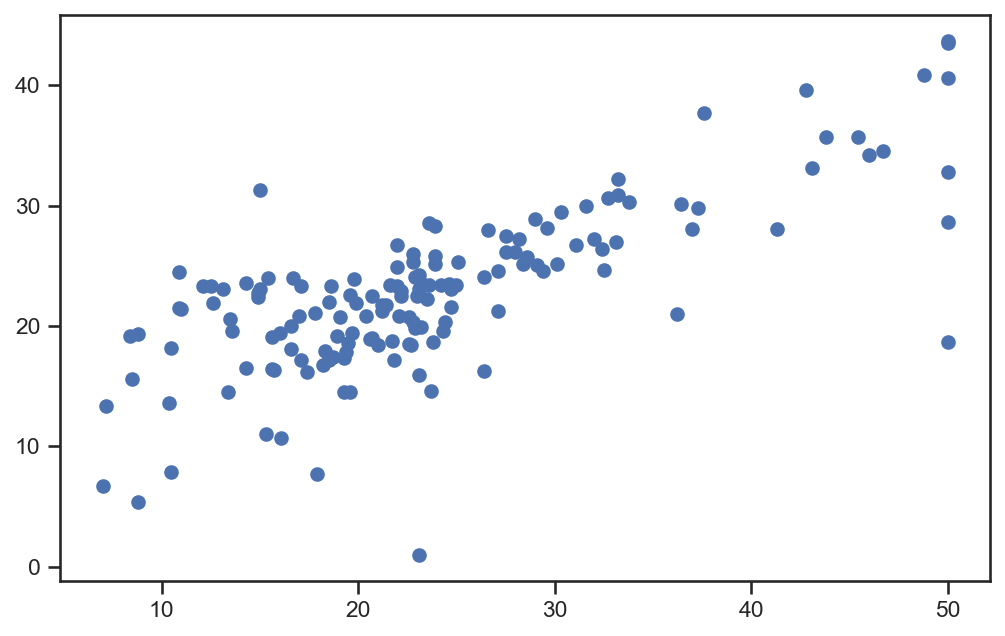

In [15]:
prediction = regressor.predict(X_test)
plt.scatter(y_test, prediction)


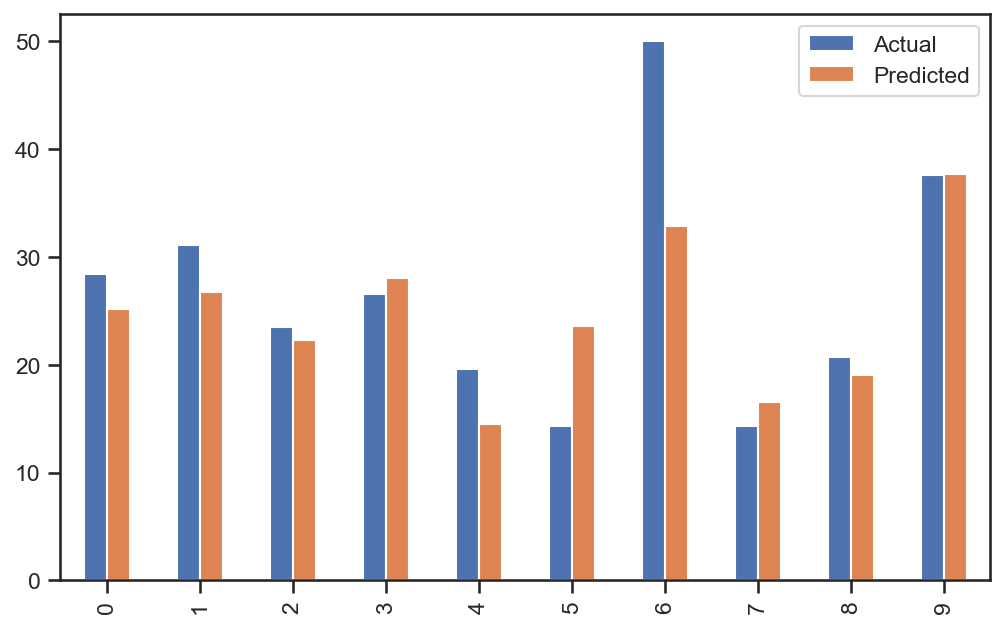

In [16]:
evaluate.head(10).plot(kind = 'bar')


In [17]:
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")

# Mean Absolute Error (MAE)
print(f"MSE score: {mean_absolute_error(y_test, y_pred)}")

# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.5383003344910231
MSE score: 4.750294229575126
MSE score: 45.0773394247183


**multiple linear regression**



In [18]:
# Preparing the data
X = df[['LSTAT','CRIM','NOX','TAX','PTRATIO','CHAS','DIS']]
y = df[['MEDV']]

# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Fitting the training data to our model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
regressor.score(X_test, y_test)

0.6446942534265364

In [20]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,27.445779
1,31.1,31.364849
2,23.5,30.681874
3,26.6,22.143726
4,19.6,23.063037
5,14.3,16.421246
6,50.0,36.733894
7,14.3,15.887917
8,20.7,25.718492
9,37.6,32.816198


Let's make another multi linear regression model with more features.

In [21]:
# Preparing the data
X = df[['LSTAT','CRIM','NOX','TAX','PTRATIO']]
y = df[['MEDV']]

# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Fitting the training data to our model
regressor.fit(X_train, y_train)

#score of this model
regressor.score(X_test, y_test)

0.5798770784084717

Accuracy of this model is 57%. Target variable's data frame for this built model is:

In [22]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,25.512908
1,31.1,31.496427
2,23.5,31.260496
3,26.6,26.553401
4,19.6,25.826407
5,14.3,17.589252
6,50.0,34.913399
7,14.3,15.165121
8,20.7,21.605243
9,37.6,31.078599
